# Regression logistique

**Objectif :**

Conception et implémentation d'un perceptron pour des fins de classification 


## 1 - Packages ##

Téléchargement des packages 
- [numpy](http://www.numpy.org) --> calcul numérique.
- [h5py](http://www.h5py.org) --> gestion des fichiers .H5
- [matplotlib](http://matplotlib.org) --> graphique en Python
- [PIL](https://python-pillow.org/) --> traitement des images (Rq : pour Python 3 : pip install pillow)
- [scipy](https://www.scipy.org/) --> calcul scientifique

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from skimage.transform import rescale, resize
import scipy

## 2 - Problématique ##

**Base**: 

La base ("data.h5") contient:
    - base d'apprentissage (m_train) images étiquettées chat (y=1) or non-chat (y=0)
    - base de test (m_test) images 
    - dim image (num_px, num_px, 3) 
    
**Objectif :**

Classifier les images selon leurs contenus chat/non-chat via un perceptron

In [ ]:
   
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test labels

    classes = np.array(test_dataset["list_classes"][:]) # list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Téléchargement
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1]


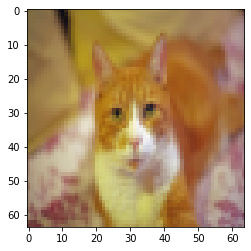

In [ ]:
# Exemple : image 
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]))

In [ ]:
##  les dimensions de la base d'pprentissage, test, 


m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]



print ("m_train = " + str(m_train))
print ("m_test = " + str(m_test))
print ("longueur/largeur de l'image: num_px = " + str(num_px))

##les dimensions de tous les données nécessaires à la mise en oeuvre du perceptron

print ("train_set_x_orig shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_orig shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


m_train = 209
m_test = 50
longueur/largeur de l'image: num_px = 64
train_set_x_orig shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x_orig shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:



train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig .reshape(test_set_x_orig .shape[0],-1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [ ]:
## Normalisation des données d'entrées
## Normaliser les image d'apprentissage 
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
print("train_set_x = ",train_set_x)
print("test_set_x = ",test_set_x)

train_set_x =  [[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]
test_set_x =  [[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


## 3 - Architecture de l'alogorithme d'apprentissage ##

- A l'aide d'un schéma, représenter le perceptron ainsi les données d'apprentissage, les paramètres,... n'oublier pas les dimensions des objets manipulés. 


**Expressions mathématiques de l'alogorithme**:

Pour une instance $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = v^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(v^{(i)}, y^{(i)}) =  - y^{(i)}  \log(v^{(i)}) - (1-y^{(i)} )  \log(1-v^{(i)})\tag{3}$$

La fonction coût est calculée à partir de toutes les instances d'apprentissage:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(v^{(i)}, y^{(i)})\tag{6}$$

**Etapes à suivre**:

- Initialisation les paramètres
- Apprentissage des paramètres du modèle
- Utilisation du modèle pour prédire s'il y en a un chat ou non dans une image
- Analyse des résultats

## 4 - Algorithme ##

### 4.1 - Fonction d'activation



In [ ]:
def sigmoid(z):
  sigm = 1/(1+np.exp(-z))
  return sigm


In [ ]:
# tester la fonction sigmoid
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### 4.2 - Initialisation des paramètres



In [ ]:
def initialize_with_zeros(dim):
  W = np.zeros([dim,1])
  b = 0.0
  return W,b

In [ ]:
# tester la fonction d'initialisation 
dim = 2
W,b = initialize_with_zeros(dim)
print ("w = " + str(W))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


### 4.3 - Propagation & Retropropagation 



Propagation:
- La valeur prédite $V = \sigma(w^T X + b) = (v^{(0)}, v^{(1)}, ..., v^{(m-1)}, v^{(m)})$
- La fonction coût $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(v^{(i)})+(1-y^{(i)})\log(1-v^{(i)})$



$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(V-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (v^{(i)}-y^{(i)})\tag{8}$$


In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
   
    m = X.shape[1]    
    # Propagation 
    V = sigmoid(np.dot(w.T,X)+b)       
    cost = -1/m * (np.dot(Y,np.log(V).T) + np.dot((1-Y),np.log(1 - V).T))
    
    # Retropropagation 
    dw = 1/m * np.dot(X,(V-Y).T)
    db = 1/m * (np.sum(V-Y))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
# test de la fonction propagate
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = [[6.00006477]]


### d) Optimisation (apprentissage)





In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
                
        # enregistrement des coût
        if i % 100 == 0:
            costs.append(cost)
        
        # affichage du coût chaque 100 instances
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
#test de la fonction
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


### e) Prédiction



In [ ]:
def predict(w, b, X):
   
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    S = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(S.shape[1]):
        if(S[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
        
    
    
    return Y_prediction

In [ ]:
#test de la fonction
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


## 5 - Modèle global ##

Implémentation de l'ensemble du modèle



In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    
    # initialisation 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descendent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train,num_iterations, learning_rate, print_cost)
    
    # extraction de w et b
    w = parameters["w"]
    b = parameters["b"]
    
    # Prediction test/apprentissage 
    Y_prediction_test = Y_test
    Y_prediction_train = Y_train

    
    # Affichage erreur de prédiction
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
# tester le modèle
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 100.0 %
test accuracy: 100.0 %


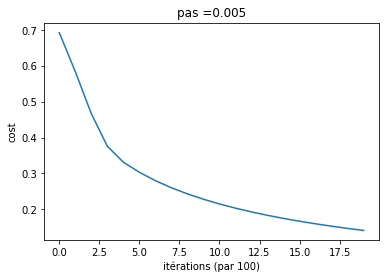

In [ ]:
# figure : évolution du coût  
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('itérations (par 100)')
plt.title("pas =" + str(d["learning_rate"]))
plt.show()

## 6 - Choix du pas d'adaptation ##

Le code suivant mets en évidence l'importance du choix du pas d'adaptation. 

learning rate is: 0.01
train accuracy: 100.0 %
test accuracy: 100.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 100.0 %
test accuracy: 100.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 100.0 %
test accuracy: 100.0 %

-------------------------------------------------------



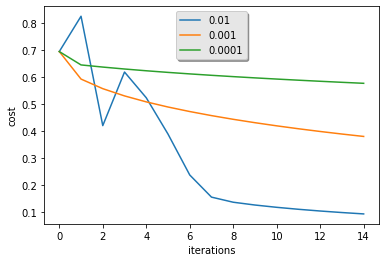

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## 7 - Tester vos propres images ##

y = 0.0, L'algorithme estime que "non-cat


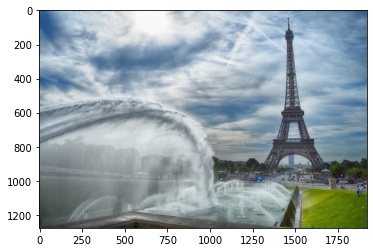

In [ ]:

my_image = "im2.jpg"   

fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = resize(image, output_shape=(64, 64)).reshape((1, 64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", L'algorithme estime que \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))

y = 1.0, L'algorithme estime que "cat


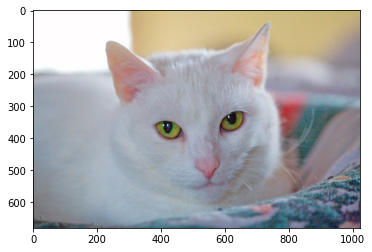

In [ ]:

my_image = "im3.jpg"   

fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = resize(image, output_shape=(64, 64)).reshape((1, 64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", L'algorithme estime que \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))